# Sentimental Analysis for Tweets

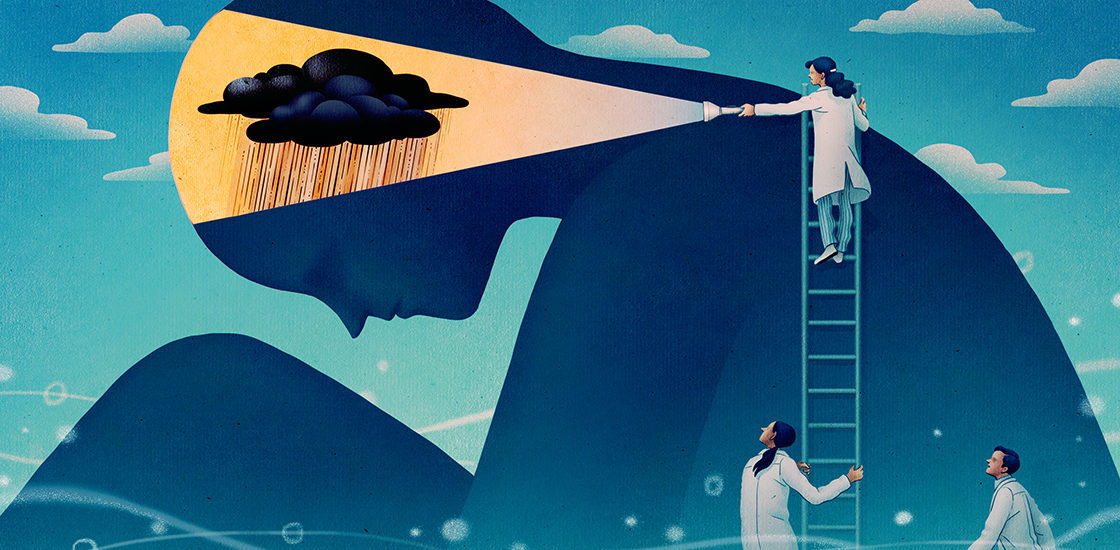

## Objectives

Aim for this project is to build a machine learning model that can classify a text to two category: depressed or not depressed using bayes formula by calculating the sentiment of the frequency words in the training data. 

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk 
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer

## Reading the data as a Pandas DataFrame 

In [2]:
tweets_df=pd.read_csv('sentiment_tweets3.csv')
tweets_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


0 means non-depressed and 1 means depressed

## Displays a concise summary of the dataframe

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


## Cheaking the missing values of the dataframe 

In [4]:
tweets_df.isna().sum().to_frame().rename(columns={0:"Missing Values"})

,Missing Values
Index,0
message to examine,0
label (depression result),0


##  Removing unnecessary rows 

In [5]:
tweets_df.drop(index=10313, inplace=True)
tweets_df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


## Cheaking the duplicate values 

In [6]:
tweets_df.duplicated().sum()

0

## Describing the dataframe 

In [7]:
tweets_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,10313.0,491223.30864,261682.893213,106.0,263019.0,514969.0,773448.0,802312.0
label (depression result),10313.0,0.22428,0.417128,0.0,0.0,0.0,0.0,1.0


In [8]:
tweets_df["label (depression result)"].value_counts(normalize=True)

0    0.77572
1    0.22428
Name: label (depression result), dtype: float64

## Data  visualization

### Pie plot between non-depressed  and depressed

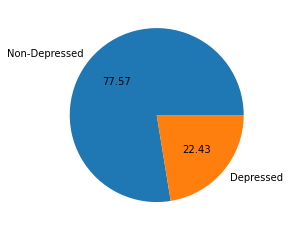

In [9]:
plt.pie(tweets_df['label (depression result)'].value_counts(), labels=['Non-Depressed', 'Depressed'],autopct="%0.2f")
plt.show()

### Bar graph between non-depressed and depressed 

Text(0.5, 1.0, 'Depression Rate in Tweets')

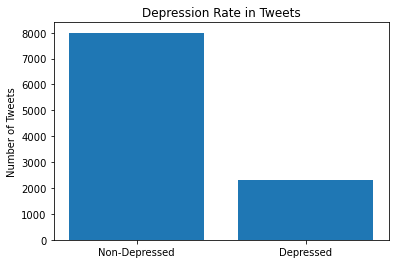

In [10]:
depression_counts = tweets_df['label (depression result)'].value_counts()

fig, ax = plt.subplots()
ax.bar(depression_counts.index, depression_counts.values)
ax.set_xticks([0, 1])  # set the x-ticks to the values in the column (0 or 1)
ax.set_xticklabels(['Non-Depressed', 'Depressed'])  # set the labels for the x-ticks
ax.set_ylabel('Number of Tweets')
ax.set_title('Depression Rate in Tweets')

## Description of words in message to examine column 

In [11]:
tweets_df['word_count']=tweets_df['message to examine'].apply(lambda x:len(x.split(" ")))
tweets_df['word_count'].describe()

count    10313.000000
mean        16.067585
std         10.024011
min          1.000000
25%          9.000000
50%         14.000000
75%         21.000000
max         92.000000
Name: word_count, dtype: float64

## Description of  characters in message to examine column 

In [12]:
tweets_df['char_count']=tweets_df['message to examine'].apply(len)
tweets_df['char_count'].describe()

count    10313.000000
mean        92.625036
std         64.667747
min          1.000000
25%         48.000000
50%         78.000000
75%        119.000000
max        874.000000
Name: char_count, dtype: float64

In [13]:
tweets_df

,Index,message to examine,label (depression result),word_count,char_count
0,106,just had a real good moment. i missssssssss hi...,0,12,57
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45
...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101
10310,802310,What do you do when depression succumbs the br...,1,18,97
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96


## Histogram of Character Count by Depression Result 

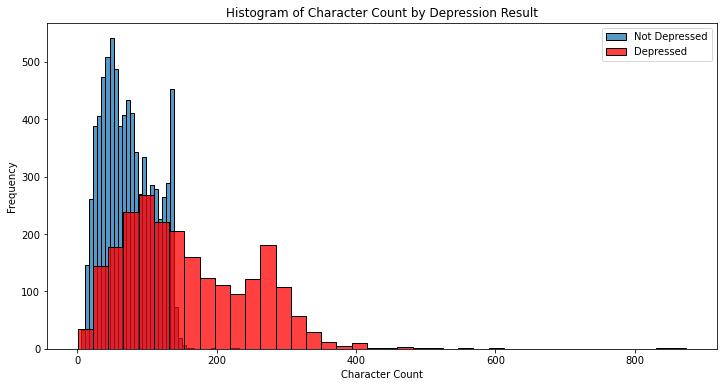

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(tweets_df[tweets_df['label (depression result)'] == 0]['char_count'])
sns.histplot(tweets_df[tweets_df['label (depression result)'] == 1]['char_count'], color='red')

plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.title('Histogram of Character Count by Depression Result')

plt.legend(labels=['Not Depressed', 'Depressed'])
plt.show()

From the generated histogram, we can understand the distribution of character counts in tweets labeled as "Not Depressed" and "Depressed." It provides insights into the typical length or number of char used in tweets related to depression, allowing us to compare the patterns and identify any noticeable differences between the two categories.

##  Histogram of Word Count by Depression Result

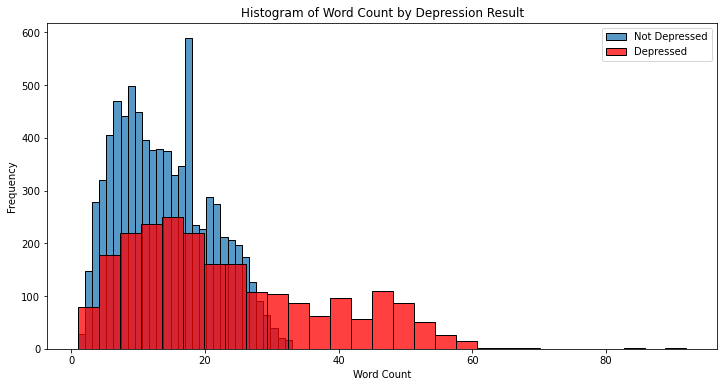

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(tweets_df[tweets_df['label (depression result)'] == 0]['word_count'])
sns.histplot(tweets_df[tweets_df['label (depression result)'] == 1]['word_count'], color='red')

plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count by Depression Result')

plt.legend(labels=['Not Depressed', 'Depressed'])
plt.show()

From the generated histogram, we can understand the distribution of word counts in tweets labeled as "Not Depressed" and "Depressed." It provides insights into the typical length or number of words used in tweets related to depression, allowing us to compare the patterns and identify any noticeable differences between the two categories.

## Pairplot 

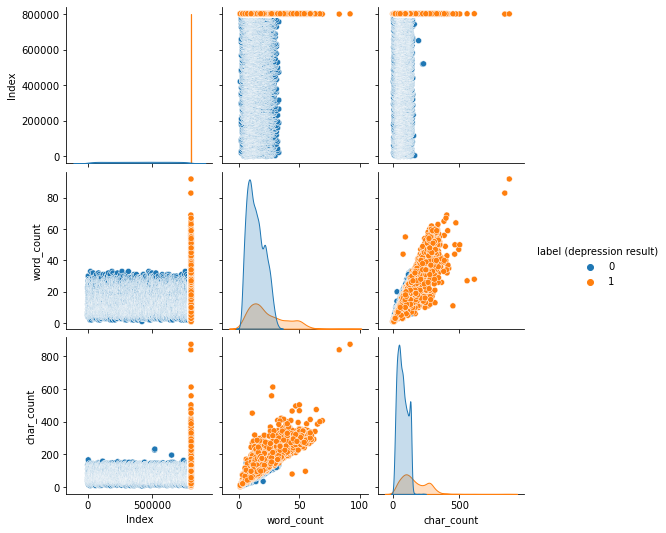

In [16]:
sns.pairplot(tweets_df,hue='label (depression result)')

The resulting pairplot allows for a comprehensive visualization of the relationships between variables in the DataFrame and how they contribute to the classification of depressed and not depressed tweets.

## Heatmap 

<AxesSubplot:>

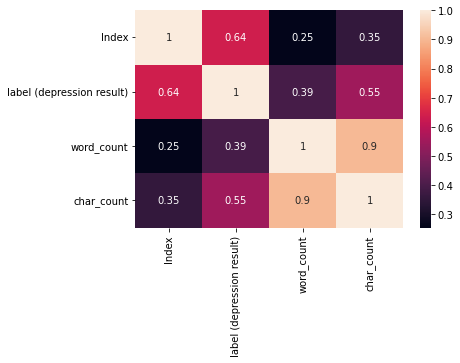

In [17]:
sns.heatmap(tweets_df.corr(),annot=True)

## Downloading the packages

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [42]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anwes\AppData\Roaming\nltk_data...


True

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anwes\AppData\Roaming\nltk_data...


True

## Data cleaning 

### 1. Removing URL’s 

Removing URLs in sentiment analysis is important because URLs typically do not contribute to the sentimentof the text. Sentiment analysis focuses on understanding and analyzing the sentiment expressed in textual data. URLs are typically external links that provide additional information or context. By removing URLs, we can improve the accuracy and effectiveness of sentiment analysis algorithms .

In [14]:
def remove_urls(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

tweets_df['urlsRemoved'] = tweets_df['message to examine'].apply(remove_urls)

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!
...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...


### 2. Removing Emoji and Emoticons 

Removing emojis and emoticons in sentiment analysis is done to simplify the text and focus on the sentiment expressed through words. Emojis and emoticons are graphical representations of emotions. By removing emojis and emoticons, sentiment analysis algorithms can focus on the sentiment expressed through textual content, such as words and phrases, which are more reliable indicators of sentiment.

In [15]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

tweets_df['emojiRemoved'] = tweets_df['urlsRemoved'].apply(remove_emoji)

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved,emojiRemoved
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!
...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...


### 3. Removing Punctuations

Removing punctuation in sentiment analysis helps reduce noise, standardize text representation, and simplify the analysis process by focusing on sentiment-bearing words and improving accuracy and efficiency.

In [16]:
pattern = r"[^\w\s]"

tweets_df['punctuation removed'] = tweets_df['emojiRemoved'].apply(lambda x: re.sub(pattern, " ", x))

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved,emojiRemoved,punctuation removed
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -,@comeagainjen -,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE
...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren t sad they ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...


### 4. Removing Stop Words 

**Stopwords:**

Stopwords are common words that are frequently used in a language and do not carry significant meaning or contribute to the overall sentiment of a text. Examples of stopwords include "the," "and," "is," "in," etc.


Stopword removal is performed in sentiment analysis to eliminate these non-informative words from the text.This helps to enhance the accuracy of sentiment classification by eliminating noise and irrelevant words from the analysis

In [17]:
STOPWORDS = set(stopwords.words('english'))

# Function to remove the stopwords
def stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])

tweets_df['stopWord_Removed'] = tweets_df['punctuation removed'].apply(stopwords)

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved,emojiRemoved,punctuation removed,stopWord_Removed
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga,is reading manga,is reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE
...,...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren t sad they ...,Many sufferers depression sad feel nothing per...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...


### 5. Lemmatization 

**Lemmatization:**

Lemmatization is the process of reducing words to their base or root form, known as the lemma. It aims to transform different inflected forms of a word into a single base form, which can help in text normalization and analysis. For example, the words "running," "runs," and "ran" would all be lemmatized to the base form "run."

In sentiment analysis,it retains the original word forms (lemmas) and provides more context and preserve the nuances of the language. However, there may be situations where simplifying the words to their base forms can help in reducing noise, improving computational efficiency.

In [18]:
lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()

def lemmatizeRows(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

tweets_df['lemmatizedRows'] = tweets_df['stopWord_Removed'].apply(lemmatizeRows)

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved,emojiRemoved,punctuation removed,stopWord_Removed,lemmatizedRows
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga,is reading manga,is reading manga,reading manga,reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...,lapcat Need send em accountant tomorrow Oddly ...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE,ADD ME ON MYSPACE
...,...,...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren t sad they ...,Many sufferers depression sad feel nothing per...,Many sufferer depression sad feel nothing pers...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...,No Depression G Herbo mood done stressing peop...
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...,What depression succumbs brain make feel like ...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...


### 6. Stemming 

**Stemming**

Stemming is a process of reducing words to their root or base form by removing prefixes and suffixes. The Porter stemmer is a widely used stemming algorithm in natural language processing.

The purpose of stemming is to reduce inflected or derived words to their core meaning, so that variations of the same word are treated as the same word. This can help in tasks like information retrieval, search engines, text mining, and sentiment analysis by reducing the vocabulary size and grouping similar words together.

In [19]:
stemmer = PorterStemmer()

def stemRows(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

tweets_df['stemmedRows'] = tweets_df['lemmatizedRows'].apply(stemRows)

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved,emojiRemoved,punctuation removed,stopWord_Removed,lemmatizedRows,stemmedRows
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...,lapcat Need send em accountant tomorrow Oddly ...,lapcat need send em account tomorrow oddli i e...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE,ADD ME ON MYSPACE,add me on myspac
...,...,...,...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren t sad they ...,Many sufferers depression sad feel nothing per...,Many sufferer depression sad feel nothing pers...,mani suffer depress sad feel noth persist nag ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...,No Depression G Herbo mood done stressing peop...,no depress g herbo mood done stress peopl deserv
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...,What depression succumbs brain make feel like ...,what depress succumb brain make feel like neve...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamin nasal spray show promis against depres...


### 7. Tokens Cleaning

**Tokens**

Tokens refer to the individual units of text, typically words or characters, that are separated by spaces or punctuation marks. Tokenization is the process of breaking a text into these individual tokens.

Token cleaning is the process of removing unnecessary elements from tokens, such as punctuation, special characters, or numeric values. It helps standardize and normalize the tokens, improves efficiency, and enhances accuracy in text analysis tasks.

In [20]:
def cleanData(text):

    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] )  # Remove repeating characters from tokens

    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) # Remove tokens containing digits

    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] ) # Remove tokens containing underscore

    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) # Remove tokens containing Special Characters

    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  # Remove tokens less than 2 characters


tweets_df['cleanTokens'] = tweets_df['stemmedRows'].apply(cleanData)

tweets_df

,Index,message to examine,label (depression result),word_count,char_count,urlsRemoved,emojiRemoved,punctuation removed,stopWord_Removed,lemmatizedRows,stemmedRows,cleanTokens
0,106,just had a real good moment. i missssssssss hi...,0,12,57,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment i missssssssss hi...,real good moment missssssssss much,real good moment miss much,real good moment miss much,real good moment miss much
1,217,is reading manga http://plurk.com/p/mzp1e,0,5,42,is reading manga,is reading manga,is reading manga,reading manga,reading manga,read manga,read manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,5,84,@comeagainjen -,@comeagainjen -,comeagainjen,comeagainjen,comeagainjen,comeagainjen,comeagainjen
3,288,@lapcat Need to send 'em to my accountant tomo...,0,23,135,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,lapcat Need to send em to my accountant tomo...,lapcat Need send em accountant tomorrow Oddly ...,lapcat Need send em accountant tomorrow Oddly ...,lapcat need send em account tomorrow oddli i e...,lapcat need send account tomorrow oddli even r...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,6,45,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE!!!,ADD ME ON MYSPACE,ADD ME ON MYSPACE,ADD ME ON MYSPACE,add me on myspac,add myspac
...,...,...,...,...,...,...,...,...,...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1,17,103,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren't sad; they ...,Many sufferers of depression aren t sad they ...,Many sufferers depression sad feel nothing per...,Many sufferer depression sad feel nothing pers...,mani suffer depress sad feel noth persist nag ...,mani suffer depress sad feel noth persist nag ...
10309,802309,No Depression by G Herbo is my mood from now o...,1,20,101,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression G Herbo mood done stressing peop...,No Depression G Herbo mood done stressing peop...,no depress g herbo mood done stress peopl deserv,depress herbo mood done stress peopl deserv
10310,802310,What do you do when depression succumbs the br...,1,18,97,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What depression succumbs brain makes feel like...,What depression succumbs brain make feel like ...,what depress succumb brain make feel like neve...,what depress succumb brain make feel like neve...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,10,96,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,ketamin nasal spray show promis against depres...,ketamin nasal spray show promis against depres...


## Creating a new dataframe with label(depression result) and cleanTokens 

In [21]:
clean_data= tweets_df.iloc[:,[2,11]]
clean_data 

,label (depression result),cleanTokens
0,0,real good moment miss much
1,0,read manga
2,0,comeagainjen
3,0,lapcat need send account tomorrow oddli even r...
4,0,add myspac
...,...,...
10308,1,mani suffer depress sad feel noth persist nag ...
10309,1,depress herbo mood done stress peopl deserv
10310,1,what depress succumb brain make feel like neve...
10311,1,ketamin nasal spray show promis against depres...


## Changing the variables names 

In [22]:
clean_data = clean_data.rename(columns={"label (depression result)": "sentiment", "cleanTokens": "text"})
clean_data

,sentiment,text
0,0,real good moment miss much
1,0,read manga
2,0,comeagainjen
3,0,lapcat need send account tomorrow oddli even r...
4,0,add myspac
...,...,...
10308,1,mani suffer depress sad feel noth persist nag ...
10309,1,depress herbo mood done stress peopl deserv
10310,1,what depress succumb brain make feel like neve...
10311,1,ketamin nasal spray show promis against depres...


## Feature extraction (vectorization) 

###  Count vectorizer

CountVectorizer is a text preprocessing technique used to convert a collection of text documents into a matrix of token counts. It counts the occurrences of each word in the documents and represents the data in a numerical format suitable for machine learning algorithms. It helps in transforming text data into a format that can be processed by machine learning models, allowing them to learn patterns and make predictions based on the frequency of words in the text.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(ngram_range=(1,2))    # Unigram and Bigram
final_vectorized_data = count_vectorizer.fit_transform(clean_data['text'])  
final_vectorized_data

<10313x76165 sparse matrix of type '<class 'numpy.int64'>'
	with 156394 stored elements in Compressed Sparse Row format>

In [24]:
#from sklearn.feature_extraction.text import TfidfVectorizer 

#tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
#final_vectorized_data = tf_idf_vectorizer.fit_transform(clean_data['text'])

#final_vectorized_data

## Splitting 

Splitting train data to test accuracy

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(final_vectorized_data, clean_data['sentiment'],
                                                    test_size=0.2, random_state=69)

Printing splitted dataset sizes

In [27]:
print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

X_train_shape :  (8250, 76165)
X_test_shape :  (2063, 76165)
y_train_shape :  (8250,)
y_test_shape :  (2063,)


## Naive Bayes 

### Bayes theorem :

Mathematically, Bayes' theorem is stated as:
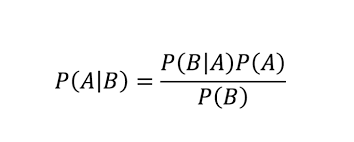

Where:

* P(A|B) represents the probability of event A given that event B has occurred.
* P(B|A) represents the probability of event B given that event A has occurred.
* P(A) and P(B) represent the probabilities of events A and B independently.

There are some popular classifiers under Naive Bayes
* Bernoulli Naive Bayes
* Gaussian Naive Bayes classifier
* Multinomial Naive Bayes

We will use **Multinomial Naive Bayes classifier**

In [28]:
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier

model_naive = MultinomialNB().fit(X_train, y_train) 
predicted_naive = model_naive.predict(X_test)
predicted_naive1 = model_naive.predict(X_train)

##  Confusion matrix 

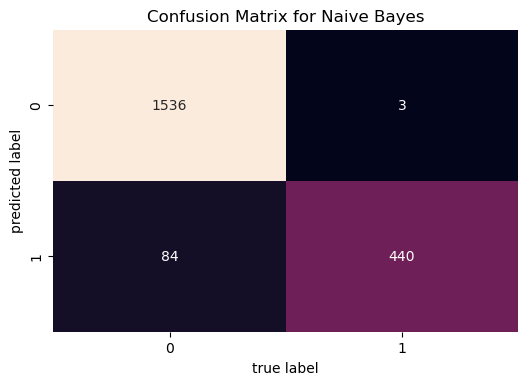

In [29]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=100)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

##  Accuracy of our prediction training data

In [30]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive1, y_train)
print("Accuracy with Naive-bayes for training data: ",score_naive)

Accuracy with Naive-bayes for training data:  0.9985454545454545


##  Accuracy of our prediction testing data 

In [31]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes for testing data: ",score_naive)

Accuracy with Naive-bayes for testing data:  0.9578284052350945


##  Precision, Recall, and Accuracy 

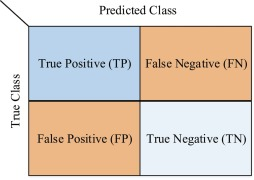

**Precision, recall, and accuracy are commonly used performance metrics in classification tasks.**

**Precision:** Precision measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). It focuses on the quality of positive predictions. A high precision indicates a low rate of false positives.

**Recall:** Recall measures the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives). It focuses on the ability to capture all positive instances. A high recall indicates a low rate of false negatives.

**Accuracy:** Accuracy measures the proportion of correctly predicted instances (both positive and negative) out of the total number of instances. It provides an overall measure of the model's correctness. However, accuracy may not be suitable when there is a class imbalance in the data.

Most frequently, precision and recall are used to measure performance since accuracy alone does not say much about how good or bad a classifier is.

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_naive))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1620
           1       0.84      0.99      0.91       443

    accuracy                           0.96      2063
   macro avg       0.92      0.97      0.94      2063
weighted avg       0.96      0.96      0.96      2063



For class 0, the precision is 1.00, which means that when the model predicts class 0, it is correct 100% of the time. The recall is 0.95, indicating that the model identifies 95% of the instances of class 0 correctly. The F1-score, which is a balanced measure of precision and recall, is 0.97.

For class 1, the precision is 0.84, suggesting that when the model predicts class 1, it is correct 84% of the time. The recall is 0.99, indicating that the model correctly identifies 99% of the instances of class 1. The F1-score is 0.91.

The overall accuracy of the model is 0.96, meaning it correctly predicts 96% of the instances in the testing data.

##  ROC curve 

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds.

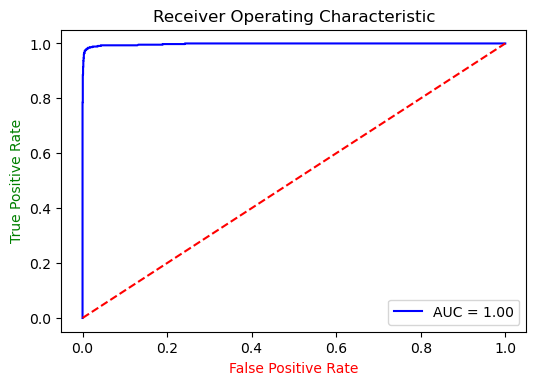

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# calculate the fpr and tpr for all thresholds of the classification
probs = model_naive.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=100)                       # to plot high quality graph
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', color='g')
plt.xlabel('False Positive Rate', color='r')
plt.show()

## Conclusion 

The classifier achieved an accuracy of approximately 96% on the testing data, which indicates that it performs well in classifying sentiments.

Looking at the precision, recall, and F1-score values, it can be observed that the model has high precision and recall for class 0 (not depressed) with values of 1.00 and 0.95, respectively. For class 1 (depressed), the precision is 0.84, indicating that the model correctly identifies depressed tweets in a majority of cases, while the recall is 0.99, indicating that the model captures most of the depressed tweets.

Overall, the model shows promising performance with high accuracy and good precision and recall values